# Outline

- raw data set to features
    - features can be used for machine learning model

- feature engineering pipelines

- raw text -> embedding (can be used by BERT algorithm)
- store the features to a centralized shairable repository called <b>fetature store</b>

# Intorduction to Feature Engineering
- topic for this week
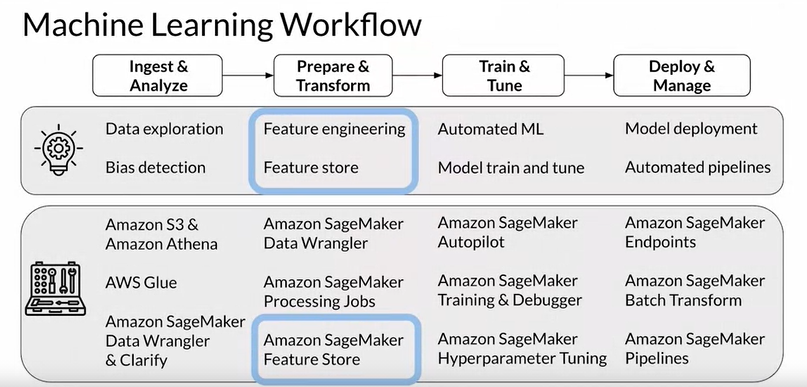

## Feature Engineering

- Raw data -> (domain knowledge/statistics) -> features
- derive useful features from raw data using the domain knowledge (applying statistical methods)
- the features should be readly usable in the machine learning alogirithm of your choice

- two main goals of feature engineering
    - best fit the algorithm of your choice
    - improves ML model performance
    
- steps involved in feature engineering
    - selection
    - creation
    - Transformation
    - <i>depending on the data set, some or all of these steps may not be relevant</i>

# Featue Engineering Steps

- selection
    - data attributes -> filter -> irrelevant and redundant attributes
    - goal here is to reduce the <b>dimentionality</b> of the feature
    - this will increase the training speed
    
    - one of the method for selection is feature importance
        - course 1 (data wrangler)
        
        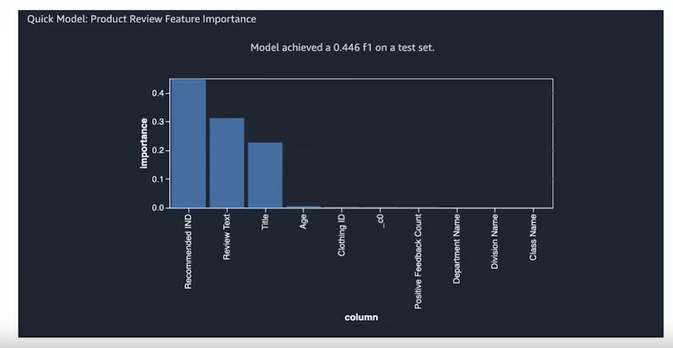
        
        - in the pic, Recommended IND, Review Text, Title are contirbuting in a major way to the model, while others are not that much.
        
- creation
    - combine existing data points -> new features
    - or infer new attributes 
    
    - <i>for example in the product review data set we inferred an attribute sentiment (negative/neutral/positive) from an existing attribute rating</i>
    
    - the idea here is using he new feature the model can predict more accurate predictions
    
- trasformation
    - calculating missing values using imputation
    - scaling numerical values (standardization/normalization)
    - non-numerical values to numerical (trasformations)
        - one hot encoding (categorical features)
        - toeknization (text)
        
        - Review text -> BERT vector
    

# Feature Engineering Pipeline

- combining earlier workflow + train/test split -> feature engineering pipeline

### Generic feature engineering pipeline

- select features and labels -> balanced dataset by label -> split data set -> trasfrom

- splitting data
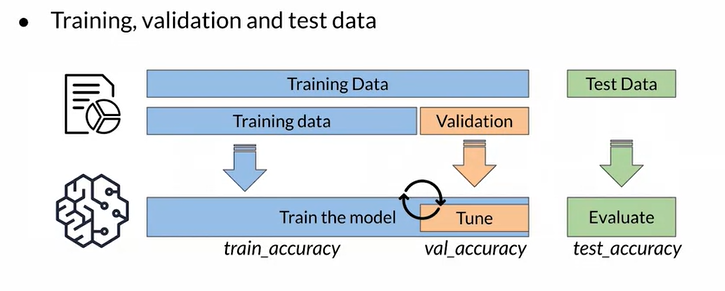

- Raw data -> Feature Engineering pipeline -> Fetures for training
- use case: - classify product review to +ve/-ve/neutral
    - product review as input
    - train the model
    - use the model to predict new product review into the above three classes

# Meet Mentors on Disclose

- [Disclose Guide](https://docs.google.com/document/d/1xrWj9plgme08hcxj5L5tEhOuQCa4W8_eN3E1kSb2pW0/edit?usp=sharing)

- [url](https://www.coursera.org/learn/ml-pipelines-bert/ungradedLti/d6G5k/have-questions-meet-us-on-discourse)

# <u>BERT and Feature Engineering at Scale</u>

# BERT: Bidirectional Encoder Represntations from Trasformers

- text to embedding
- nerualnetwrok based
- NLP progression over the period
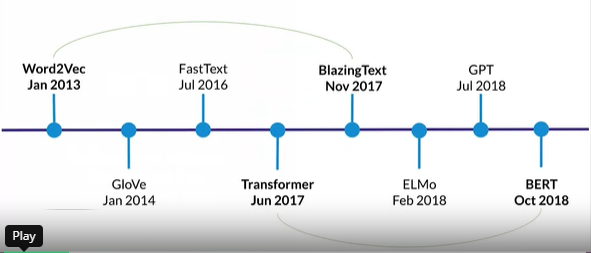

- BlazingText vs BERT
    - Blazing text based on Word2Vec where as BERT based on Trasformers
    - Blazing text operates at word level while BERT operates at sentence level
    - Since Trasformes are bidirectional, BERT can capture the context of a word
    - Balzing text
        - learns embeddings for all the words in the training corpus
        - the words are projected to a higher dimensional vector space
        - similar words will generate vector close tougher
        - for example, consider the word 'dress' inspite of the position at which the word appear, the Blazing text will give same embedding to the word. Hence, the context of the word is not considered here. 
        
    - BERT
        - input is the sentence itself, the output is the embedding, based on 3 individual components
        - the 3 components are token, segment, and position
        - consider 2 sentences
            - i love the dress
            - i love the dress, but not the price
            - here the context of the dress is different, since in the second sentance as the word 'but' is coming. Since the BERT is bidirectional, it can consider the context of the word 'but'. 
            - Hence, the embeddings generated for the word dress in these sentences will be completely different.
    
        - with BERT we encode sequences
        
        

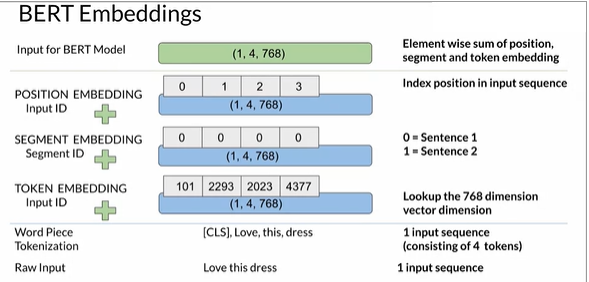
<i>end to end encodeing of BERT</i>

# BERT Example

- converting text into BERT Embeddings
- <b>Refer the fig above</b>
- take raw text as input as example 'love this dress'
- tokenize the sentence, here you can see the token '[CLS]' this is to specify the task is classification. Incase if there is multi sentence, then there will be one more token to sepcify the sentence seperator '[SEP]'.
- the third step is to give tokens, and embedd the tokens. we are using 768 dimension vector to embedd the vector. Hence, the shape is (1, 4, 768)(no of words, sentence, vector dim). Here 101 means the word [CLS] is at the 101 word in the vector.
- then the segment embedding, that is what is the position of the sentence, in this case the fist sentence is indexed is at 0, so all the words are given a segment embedding of 0.
- next comes the position embedding, what is the position of the word in that sentence, starting with 0.
- the final embedding is the sum of all 3 embeddings ie token + segment + position
- this embedding can be directly used by the BERT algorithm.

# Feature Engineering: At scale with Amazon SageMaker Processing Jobs

- Scikit learn
    - RoBERTa tokenizer class
        - built on top of BERT model
        - modified some hyper-parameter and the way in which the model is trained
        - use more words to train the model than the original BERT model

In [ ]:
from trasformers import RobertaTokenizer

PRE_TRAINED_MODEL_NAME = 'roberta-base'

# constructed the class
tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

def convert_to_bert_input_ids(...):
    encode_plus = tokenizer.encode_plus(
        review, # input data to be encoded(raw data)
        add_special_tokens=True, # special tokens
        max_length=128, # maximum sequence length
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )
    
    return encoder_plus['input_ids'].flatten().tolist()

- max_length parameter: - maximum number of tokens to be passed to the model in a single sample. To determine the right size find the length of each sentence. 
- in the review example the maximum lenght review has a length of 115 words.
- real challenge is to do the embeddings at scale
    - to address this use Amazon SageMaker Processing
    
    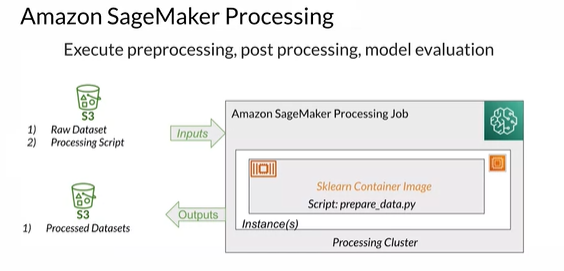
    
    - help to perform
        - pre processing
        - post processing
        - data related task at scale
        
    - distributed cluster
    - data should be in s3 bucket (raw data)
    - o/p will be written back to an s3 specified
    

In [ ]:
# Amazon SageMaker Processing with scikit-learn

from sagemaker.sklearn.preprocessing import SKLearnProcessor
from sagemaker.processing import ProcessingInput, ProcessingOutput

processor = SKLearnProcessor(
    framework_version='SCIKIT_LEARN_VERSION',
    role=role,
    instance_type='ml.c5.4xlarge',
    instance_count=2
) # to setup the processing cluster

process.run(
    <parameters> 
) # to run the processing job

# the parameter include 
# 1. the script to excecute

code = 'preprocess-sklearn-text-to-bert.py' #Scikit-learn script to execute

inputs = [
    ProcessingInput(
        input_name='raw-input-data',
        source=raw_input_data_s3_uri,
        ...
    )
] # input data to trasfrom

outputs = [
    ProcessingOutput(
        output_name='bert_train',
        s3_upload_mode='EndofJob',
        source='/opt/ml/processing/output/bert/train', #output from the processing job
        ...
    )
]

# more details on this week lab

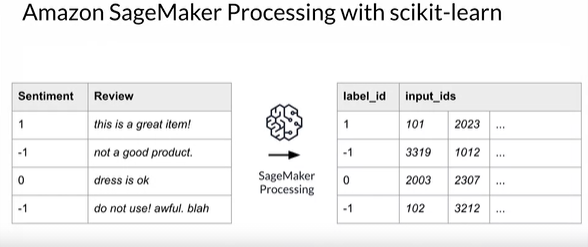

# <u>Feature Store</u>

- lot of work going into feature engineering
    - if we save features then it will save time
    - other people can use the generated features
    
- feature store is a repository to store engineered features
    - 3 main points to be considered for the feature store
        - centralized: - multiple teams can contribute
        - reusable: - accross machine learning projects
        - discoverable: - any team member can access the features and use these features in their machine learning project
        
## Machine learning pipeline to include feature store
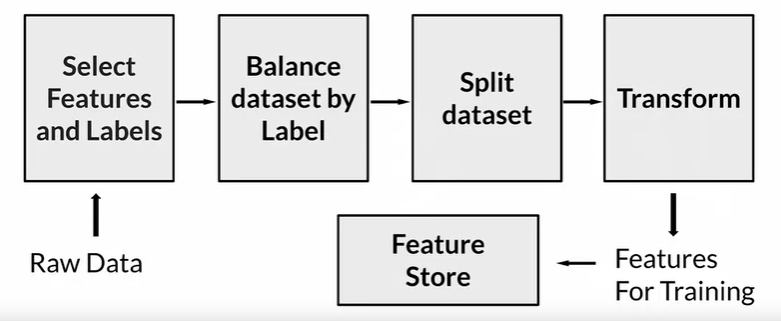
        

- 2 ways to create a feature store
    - a database
    - Amazon SageMaker Feature Store
        - a managed service
        - purpose driven

# Amazon SageMaker Feature Store

- Fully managed purpose billed 
- caipabilities
    - centralized location
    - reuse features across multiple machine learning projects
    - real time and batch prediction abilities
    
## APIs 

In [ ]:
# create

from sagemaker.feature_store.feature_group import FeatureGroup

# name
reviews_feature_group_name = 'reviews_distilber_max_seq_length_128'

reviews_feature_group = FeatureGroup(
    name=...,
    feature_definitions=...,
    sagemaker_session=sagemerk_session
)

reviews_feature_group.create(
    s3_uri='s3://{}/{}'.format(bucket, prefix),
    record_identifier_name=record_identifier_feature_name,
    event_time_feature_name=event_time_feature_name,
    role_arn=role
) # to create the feature store

# find the lab for more details

- feature group
    - create a set of features and treat them as a group
    - expects a name and feture defenition
    - feture definition is the individual name and type of the features
    
- once name and feature definition is ready you can create the feture gourp
    - once the group is created, we need to ingest features into the feature group

In [ ]:
# ingest
review_feature_group.ingest(
    data_frame=df_records,
    max_workers=3,
    wait=True
)

- once the feature goroup is created, you can retrieve the data using retrieve method

In [ ]:
review_feature_store_query = review_feture_group.athena_query() #query s3

reviews_feature_store_table = reviews_feature_store_query.table_name

query_string = 'SELECT review_body, input_ids, input_mask, \
segment_ids, labels_id FROM "{}" LIMIT 5'.format(
    review_feature_store_table
) # query string

reviews_feature_store_query.run(
    query_string=..., ...
) # execute the query

## Visual Representation of feature store
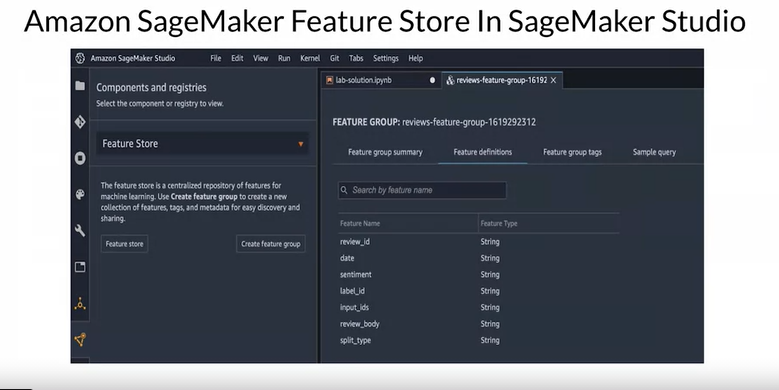

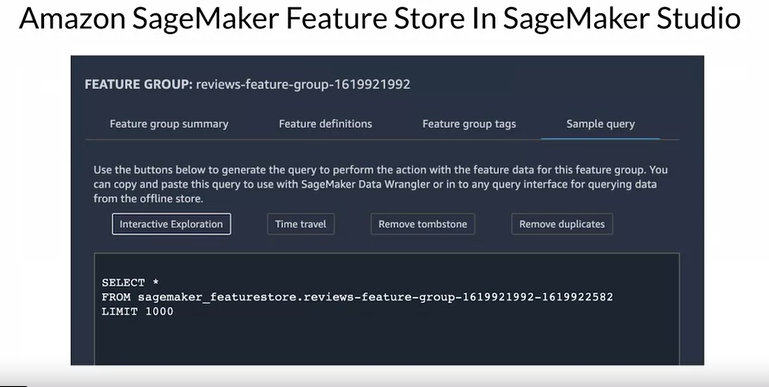

# Referance Materials

- If you wish to dive more deeply into the topics covered this week, feel free to check out these optional references. (You won’t have to read these to complete this week’s practice quizzes.)

- [RoBERTa: A Robustly Optimized BERT Pretraining Approach ](https://arxiv.org/abs/1907.11692)
- [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)


- location to lab: - aws s3 cp --recursive s3://dlai-practical-data-science/labs/c2w1-487391/ ./